In [2]:
import numpy as np
import pandas as pd
import os
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

from os.path import join as pjoin
import itertools as it

%config InteractiveShell.ast_node_interactivity='all'
%config InlineBackend.figure_format = 'svg'

In [3]:
# helper functions

In [4]:
def set_B_and_C(tdf, column):
    """This helper function sets the concentraiton values B and
    C on the dataframe for regressiong purposes and so that the 
    plotting function can plot the right values on the x-axis"""
    
    df = tdf.copy()
    
    rows = df['row'].unique()
    cols =  df['col'].unique()
    
    for row in rows:
        df.loc[(df['row']==row) & (df['col']==12), column]
        value = df.loc[(df['row']==row) & (df['col']==12), column][0]
        df.loc[df['row']==row, 'B'] = value

    for col in cols:
        value = df.loc[(df['row']=='H') & (df['col']==col), column][0]
        df.loc[df['col']==col, 'C'] = value
    
    return df

# data

In [5]:
path = '../data_o/calibration/single_species_calibration/parsed_data'
fname = 'single_strain_calibration_dataframe.csv'

In [6]:
df = pd.read_csv(pjoin(path,fname),index_col='well')


In [7]:
df['F680'] = np.log(df['F680'])

In [8]:
df['560'] = np.log(df['560'])
df = set_B_and_C(df, column='560')
df['col'] = df['col'].map(str)
df.head()

,row,col,B_lbl,C_lbl,F680,A680,A750,320,325,330,...,765,770,775,780,785,790,795,800,B,C
well,,,,,,,,,,,,,,,,,,,,,
A1,A,1,0.200,0.25,8.448700,0.8037,0.5047,1.2715,1.2378,1.2060,...,0.4998,0.4967,0.4940,0.4912,0.4885,0.4864,0.4839,0.4818,-1.048395,-0.830113
B1,B,1,0.175,0.25,8.483636,0.8649,0.5056,1.3232,1.2909,1.2618,...,0.5002,0.4970,0.4938,0.4907,0.4879,0.4854,0.4827,0.4804,-1.140372,-0.830113
C1,C,1,0.150,0.25,8.442685,0.7752,0.4730,1.2239,1.1916,1.1623,...,0.4644,0.4610,0.4585,0.4558,0.4532,0.4509,0.4484,0.4463,-1.317888,-0.830113
D1,D,1,0.125,0.25,8.471777,0.7808,0.4494,1.2006,1.1676,1.1380,...,0.4321,0.4289,0.4263,0.4235,0.4209,0.4186,0.4161,0.4139,-1.455430,-0.830113
E1,E,1,0.100,0.25,8.504918,0.7615,0.4315,1.1756,1.1432,1.1149,...,0.4169,0.4136,0.4111,0.4084,0.4058,0.4033,0.4008,0.3986,-1.584258,-0.830113


,B,C,560,F680
well,,,,
H1,-2.465104,-0.830113,-0.830113,8.803424
H2,-2.465104,-0.897960,-0.897960,8.781709
H3,-2.465104,-1.116878,-1.116878,8.683385
H4,-2.465104,-1.132583,-1.132583,8.653471
H5,-2.465104,-1.218410,-1.218410,8.572628
H6,-2.465104,-1.346689,-1.346689,8.442685
H7,-2.465104,-1.514128,-1.514128,8.261785
H8,-2.465104,-1.639897,-1.639897,8.161660
H9,-2.465104,-1.825730,-1.825730,7.737180


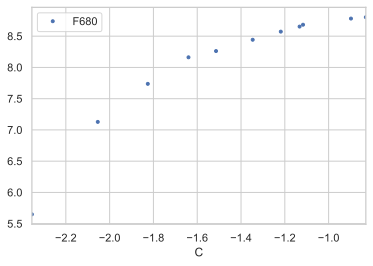

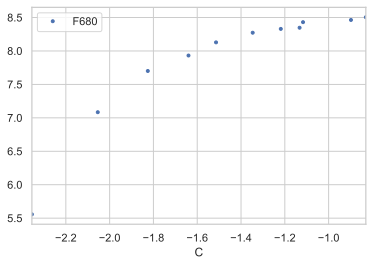

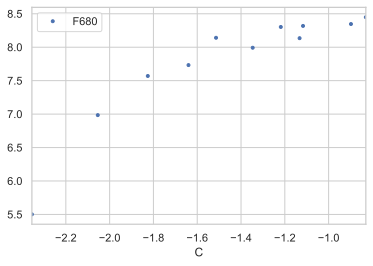

In [9]:
df[df['row'].str.contains('H')][['B','C','560','F680']]
df[df['row'].str.contains('H')][['B','C','560','F680']][:11].plot(x='C', y='F680', style='.')
df[df['row'].str.contains('E')][['B','C','560','F680']][:11].plot(x='C', y='F680', style='.')
df[df['row'].str.contains('A')][['B','C','560','F680']][:11].plot(x='C', y='F680', style='.')

In [ ]:
# fig, ax = plt.subplots(figsize=(9,6))
# df[df['col'].str.contains('12')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('11')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('10')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('9')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('8')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('7')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('6')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('5')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('4')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('3')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('2')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)
# df[df['col'].str.contains('1')][['B','C','560','F680']][:11].plot(x='B', y='F680', style='.', ax=ax)


# #df[df['row'].str.contains('')][['B','C','560','F680']][:11].plot(x='C', y='F680')
# #df[df['row'].str.contains('A')][['B','C','560','F680']][:11].plot(x='C', y='F680')


# In the above:
    
    In the above we're trying to see if the log(F680) vs. the log(B || C) at different gradients behaves the same as the Absorbance measurements vs B || C
    
    Results Inconclusive

# Below
    
    Here we want to get a rough estimate on how many Bacteria it takes to block out the same amount of light that Chlamydomonas does.
    
    Twin-Ax CC and A560 on the Y axis, why A560 because we note that there is little absorbtion from chlorophyl at this wavelength so we can compare these and come up with a good way to correct for size.
    
    

In [10]:
path = '../data_o/calibration/community_calibration/parsed_data'
fname = 'community_calibration_w_cell_counts_df.csv'

In [11]:
tdf = pd.read_csv(pjoin(path,fname), index_col='well')


In [12]:
tdf.head()

tdf = set_B_and_C(tdf, '560')
tdf['col'] = tdf['col'].map(str)

######################################
# correct values used for regression #
######################################
for col in [i for i in tdf.columns[4:].values if 'sdv' not in i]:
    #subtract 'blank' well values
    tdf.loc[:,col] = tdf.loc[:,col] - tdf.loc['H12',col]

,row,col,B_lbl,C_lbl,B_cc,C_cc,A600,A600_sdv,A680,A680_sdv,...,660,670,680,690,700,710,720,730,740,750
well,,,,,,,,,,,,,,,,,,,,,
A1,A,1,0.4,0.50,779407242.5,4446473.150,1.2992,0.0618,1.6864,0.0686,...,1.3647,1.4972,1.5497,1.3140,1.0572,0.9754,0.9408,0.9182,0.9070,0.8938
A2,A,2,0.4,0.46,779407242.5,4081862.352,1.2346,0.0746,1.5865,0.0742,...,1.2893,1.4052,1.4503,1.2545,1.0092,0.9344,0.9016,0.8808,0.8697,0.8566
A3,A,3,0.4,0.42,779407242.5,3717251.554,1.1739,0.0768,1.4931,0.0818,...,1.2037,1.3148,1.3579,1.1660,0.9529,0.8843,0.8539,0.8342,0.8238,0.8115
A4,A,4,0.4,0.38,779407242.5,3352640.755,1.1160,0.0732,1.3957,0.0791,...,1.1305,1.2287,1.2677,1.0978,0.9071,0.8442,0.8167,0.7978,0.7881,0.7764
A5,A,5,0.4,0.34,779407242.5,2988029.957,1.0906,0.0785,1.3394,0.0879,...,1.0828,1.1719,1.2072,1.0539,0.8788,0.8212,0.7946,0.7767,0.7667,0.7552


# Drop 'B12' and (Don't Force Zero)

,B,C,560,B_cc,C_cc
well,,,,,
A12,0.4780,0.0,0.4780,779407242.5,0.0
C12,0.3888,0.0,0.3888,584555431.9,0.0
D12,0.3008,0.0,0.3008,487129526.6,0.0
E12,0.2673,0.0,0.2673,389703621.3,0.0
F12,0.2041,0.0,0.2041,292277715.9,0.0
G12,0.1378,0.0,0.1378,194851810.6,0.0
H12,0.0000,0.0,0.0000,0.0,0.0


,B,C,560,B_cc,C_cc
well,,,,,
H1,0.0,0.6999,0.6999,0.0,4446473.150
H2,0.0,0.6313,0.6313,0.0,4081862.352
H3,0.0,0.5892,0.5892,0.0,3717251.554
H4,0.0,0.5630,0.5630,0.0,3352640.755
H5,0.0,0.5084,0.5084,0.0,2988029.957
H6,0.0,0.4475,0.4475,0.0,2623419.159
H7,0.0,0.3913,0.3913,0.0,2258808.360
H8,0.0,0.3235,0.3235,0.0,1894197.562
H9,0.0,0.2445,0.2445,0.0,1529586.764


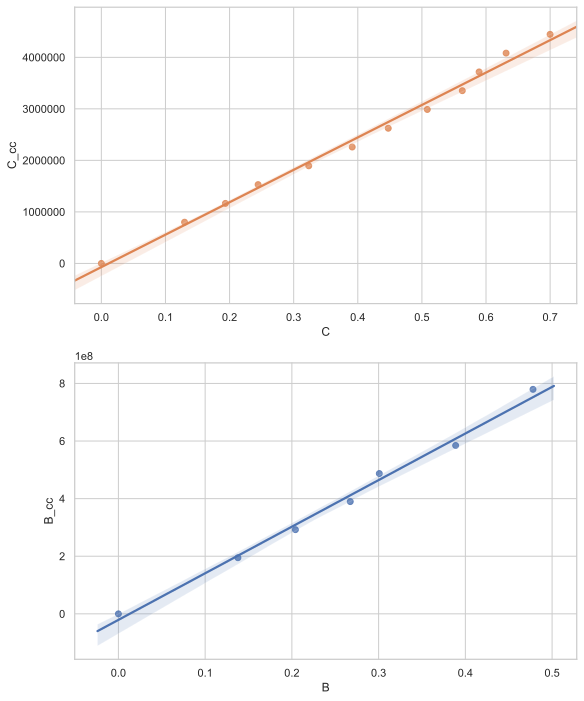

In [17]:
fig,ax = plt.subplots(nrows=2, figsize=(9,12))
#ax2 = ax.twinx()

pB = tdf[tdf['col'].str.contains('12')][['B','C','560','B_cc', 'C_cc']].drop('B12')
pC = tdf[tdf['row'].str.contains('H')][['B','C','560','B_cc', 'C_cc']]

pB
pC

#plt.show()
sns.regplot(data=pB, x='B', y='B_cc', ax=ax[1]);

sns.regplot(data=pC, x='C', y='C_cc',ax=ax[0]);

#tdf[tdf['row'].str.contains('H')][['B','C','560','B_cc', 'C_cc']].plot(x='560', y='C_cc', ax=ax, style='-.')
#tdf[tdf['col'].str.contains('12')][['B','C','560','B_cc', 'C_cc']].plot(x='560', y='B_cc', ax=ax2, style='-.')



from sklearn.linear_model import LinearRegression

yB = pB[['B_cc']]
xB = pB[['B']]

yC = pC[['C_cc']]
xC = pC[['C']]

lin_reg_objs = [LinearRegression() for i in range(2)]

kB = lin_reg_objs[0].fit(X=xB, y=yB)
kC = lin_reg_objs[1].fit(X=xC, y=yC)


theor_abs = np.linspace(0, 1, 50).reshape(-1,1)
tB = kB.predict(theor_abs)
tC = kC.predict(theor_abs)

sB = pd.Series(data=tB.ravel())
sC = pd.Series(data=tC.ravel())
t560 = pd.Series(data=theor_abs.ravel())

tho = pd.DataFrame(data=[t560, sB, sC],).T

tho[3] = tho[1] / tho[2]
tho.columns = [['th_560', 'pB_cc', 'pC_cc', 'b_c_ratio']]
tho1 = tho.copy()



# Force Through Zero

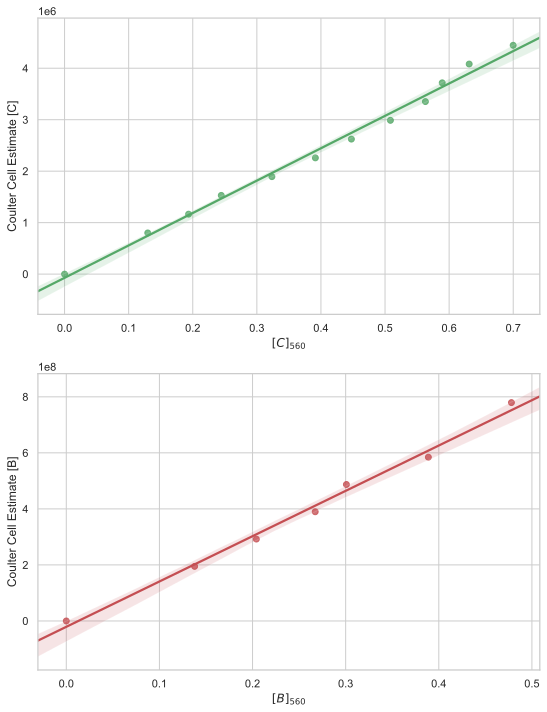

In [15]:
fig,ax = plt.subplots(nrows=2, figsize=(9,12))
#ax2 = ax.twinx()

pB = tdf[tdf['col'].str.contains('12')][['B','C','560','B_cc', 'C_cc']].drop('B12')
pC = tdf[tdf['row'].str.contains('H')][['B','C','560','B_cc', 'C_cc']]

pB
pC


#plt.show()
sns.regplot(data=pB, x='B', y='B_cc', ax=ax[1], color='r')
sns.regplot(data=pC, x='C', y='C_cc',ax=ax[0], color='g')


ax[0].set_ylabel('Coulter Cell Estimate [C]')
ax[0].set_xlabel('$[C]_{560}$')


ax[1].set_ylabel('Coulter Cell Estimate [B]')
ax[1].set_xlabel('$[B]_{560}$')


ax[0].set
ax[0].ticklabel_format(style='sci', scilimits=(0,0), axis='y');
#ax[1].set_ylim(0, 10e9)
#(m, n), pair of integers; if style is 'sci', scientific notation will be used for numbers outside the range 10m to 10n. U

#tdf[tdf['row'].str.contains('H')][['B','C','560','B_cc', 'C_cc']].plot(x='560', y='C_cc', ax=ax, style='-.')
#tdf[tdf['col'].str.contains('12')][['B','C','560','B_cc', 'C_cc']].plot(x='560', y='B_cc', ax=ax2, style='-.')

In [18]:
from sklearn.linear_model import LinearRegression

yB = pB[['B_cc']]
xB = pB[['B']]

yC = pC[['C_cc']]
xC = pC[['C']]

lin_reg_objs = [LinearRegression(fit_intercept=False) for i in range(2)]

kB = lin_reg_objs[0].fit(X=xB, y=yB)
kC = lin_reg_objs[1].fit(X=xC, y=yC)
    

theor_abs = np.linspace(0, 1, 50).reshape(-1,1)
tB = kB.predict(theor_abs)
tC = kC.predict(theor_abs)
    
    
sB = pd.Series(data=tB.ravel())
sC = pd.Series(data=tC.ravel())
t560 = pd.Series(data=theor_abs.ravel())

tho = pd.DataFrame(data=[t560, sB, sC],).T

tho[3] = tho[1] / tho[2]
tho.columns = [['th_560', 'pB_cc', 'pC_cc', 'ratio']]
tho2 = tho.copy()
# I expect that there is a constant ratio between the two @ any given signal and that at this signal is 
# proportional to the average bacterial cell size in a given community and the average cell size of chlamydomonas
# given that absorbtion is proportional to the stuff that is in the medium

# We now know that per unit absorbance there are about 260x as many more bacterial cells as chlamydomonas


# you're saying that with tho.r.mean() we establish that chlamy is  260x the size of a common bacteria?



# The problem is that when we make predictions we cannot say what those prediction ratios tell us about
# the cell ratios in our system... before the new community and cell count data we could only make 
# A560 predictions... and these ratios do not relate well to ratios of cells because we didn't know 
# how



# How can we use it?!

# Well we know that 
############# ------ ITS NOT -----------------------

# lets see.... the results wont make a difference however

# bacter cell size
# 0.2 - 2 um

# chlamy cell sie
# 20 um 

# bacterial cell size https://aem.asm.org/content/79/24/7610


# column zero below essentially tells us that what the OD-560 is for either species

In [24]:
kB.coef_[0][0]
kC.coef_[0][0]

1555950995.4538684

6151566.779245337

In [15]:
pd.options.display.max_rows = 15
tho1
tho2
pd.options.display.max_rows = 100


,th_560,pB_cc,pC_cc,b_c_ratio
0,0.000000,-2.087243e+07,-7.166280e+04,291.258900
1,0.020408,1.213845e+07,5.677722e+04,213.790796
2,0.040816,4.514932e+07,1.852172e+05,243.764147
3,0.061224,7.816020e+07,3.136572e+05,249.189826
4,0.081633,1.111711e+08,4.420973e+05,251.462921
5,0.102041,1.441819e+08,5.705373e+05,252.712572
6,0.122449,1.771928e+08,6.989773e+05,253.502967
...,...,...,...,...
43,0.877551,1.398595e+09,5.451258e+06,256.563751
44,0.897959,1.431606e+09,5.579698e+06,256.574114


,th_560,pB_cc,pC_cc,ratio
0,0.000000,0.000000e+00,0.000000e+00,NaN
1,0.020408,3.175410e+07,1.255422e+05,252.935724
2,0.040816,6.350820e+07,2.510844e+05,252.935724
3,0.061224,9.526231e+07,3.766265e+05,252.935724
4,0.081633,1.270164e+08,5.021687e+05,252.935724
5,0.102041,1.587705e+08,6.277109e+05,252.935724
6,0.122449,1.905246e+08,7.532531e+05,252.935724
...,...,...,...,...
43,0.877551,1.365426e+09,5.398314e+06,252.935724
44,0.897959,1.397180e+09,5.523856e+06,252.935724


In [16]:
chart = pd.DataFrame(index=range(0,50), columns=range(0,50))

chart.loc[0] = pd.Series(theor_abs.ravel())
chart[0] = pd.Series(theor_abs.ravel())


for i in range(len(chart.columns.values)-1):
    for j in range(len(chart.index.values)-1):
        # row changes before column therefore  
        chart.iloc[i+1, j+1] = chart.iloc[0,j+1] / chart.iloc[i+1, 0]

chart.index = chart[0].round(3)
chart.columns = chart[0].round(3)

chart.index.name = None



# row 0.000 pB-cc
chart.iloc[0,:] = tho2['pB_cc'].values.ravel()
#= tho2['pB_cc'].values

# col 0.00
chart[0.] = tho2['pC_cc'].values

chart

,0.0,0.02,0.041,0.061,0.082,0.102,0.122,0.143,0.163,0.184,...,0.816,0.837,0.857,0.878,0.898,0.918,0.939,0.959,0.98,1.0
0.000,0.000000e+00,3.17541e+07,6.35082e+07,9.52623e+07,1.27016e+08,1.58771e+08,1.90525e+08,2.22279e+08,2.54033e+08,2.85787e+08,...,1.27016e+09,1.30192e+09,1.33367e+09,1.36543e+09,1.39718e+09,1.42893e+09,1.46069e+09,1.49244e+09,1.5242e+09,1.55595e+09
0.020,1.255422e+05,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0.041,2.510844e+05,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5
0.061,3.766265e+05,0.333333,0.666667,1,1.33333,1.66667,2,2.33333,2.66667,3,...,13.3333,13.6667,14,14.3333,14.6667,15,15.3333,15.6667,16,16.3333
0.082,5.021687e+05,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,...,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25
0.102,6.277109e+05,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,...,8,8.2,8.4,8.6,8.8,9,9.2,9.4,9.6,9.8
0.122,7.532531e+05,0.166667,0.333333,0.5,0.666667,0.833333,1,1.16667,1.33333,1.5,...,6.66667,6.83333,7,7.16667,7.33333,7.5,7.66667,7.83333,8,8.16667
0.143,8.787953e+05,0.142857,0.285714,0.428571,0.571429,0.714286,0.857143,1,1.14286,1.28571,...,5.71429,5.85714,6,6.14286,6.28571,6.42857,6.57143,6.71429,6.85714,7
0.163,1.004337e+06,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1,1.125,...,5,5.125,5.25,5.375,5.5,5.625,5.75,5.875,6,6.125
0.184,1.129880e+06,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1,...,4.44444,4.55556,4.66667,4.77778,4.88889,5,5.11111,5.22222,5.33333,5.44444


In [19]:
path = '../data_o/calibration/community_calibration/created_models'


# chart.to_csv(pjoin(path,'b_c_ratio_lookup_table.csv'))

In [18]:
# differences in coefficients

cfs = pd.read_csv('./all_model_coefficients.csv', index_col=0)

cfs['d680'] = np.sqrt(np.power((cfs['kC680'].values - cfs['kB680'].values),2))
cfs['d720'] = np.sqrt(np.power(cfs['kB720'].values - cfs['kC720'].values,2))

cfs['d680'].argmax()
cfs['d720'].argmax()

cfs['ds'] = cfs['d680'] + cfs['d720']

cfs['ds'].argmax()

/home/rdmtinez/program_files/anaconda3/envs/fluxy/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


800

/home/rdmtinez/program_files/anaconda3/envs/fluxy/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':


680

/home/rdmtinez/program_files/anaconda3/envs/fluxy/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  del sys.path[0]


800